# Simple iris flower dataset for exploration and classification

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [3]:
df = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

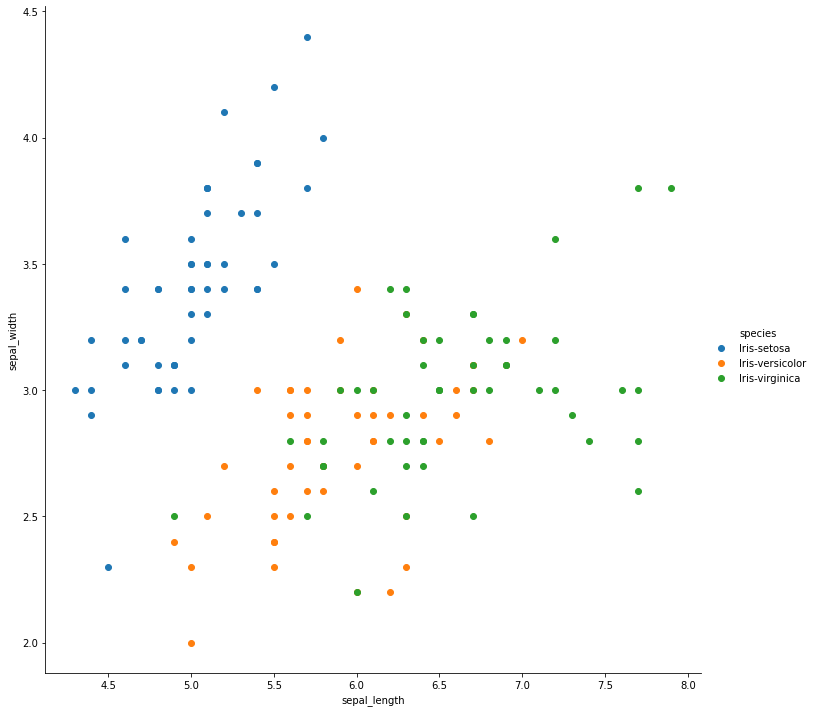

In [9]:
# scatter plot of sepal length by sepal width
sns.FacetGrid(df, hue= 'species', height = 10) \
   .map(plt.scatter, 'sepal_length', 'sepal_width') \
   .add_legend()

## For the setosa species, the sepal length is usually much shorter than the other 2 species.
## Additionally, the versicolor and virginica species have a lot of overlap with these 2 variables.

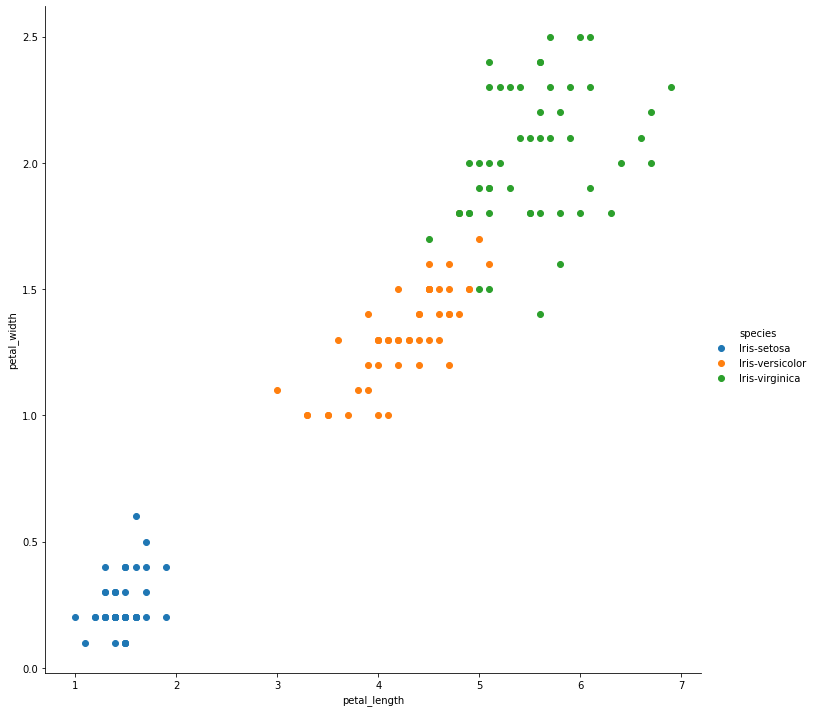

In [10]:
# scatter plot of petal length by petal width
sns.FacetGrid(df, hue= 'species', height = 10) \
   .map(plt.scatter, 'petal_length', 'petal_width') \
   .add_legend()

## There is now a lot of separation between the species.  The setosa species has the smallets petals,
## followed by the versicolor and virginica that have the largest petals.

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

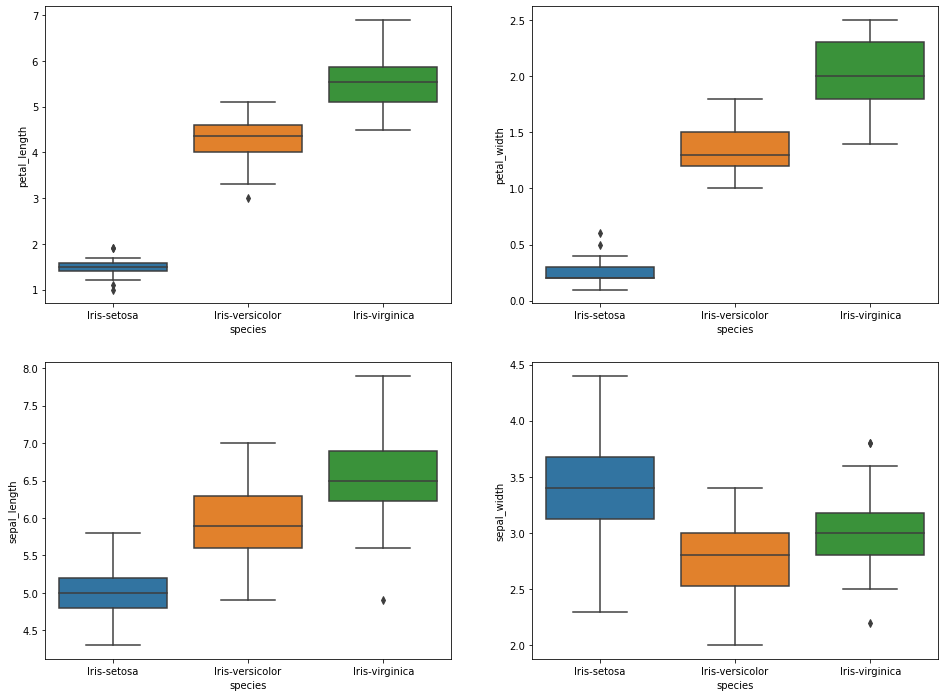

In [11]:
# Look at boxplots of the data.
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='sepal_width',data=df)

## May be easier to see the trends across species by the 4 variables with 4 boxplots.

## Create some features

In [12]:
# categorize flowers as small (0), medium (1), or big (2)

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [15]:
df['sepal_length_CAT'] = pd.cut(df['sepal_length'], 3)
print(df['sepal_length_CAT'])

0      (4.296, 5.5]
1      (4.296, 5.5]
2      (4.296, 5.5]
3      (4.296, 5.5]
4      (4.296, 5.5]
           ...     
145      (5.5, 6.7]
146      (5.5, 6.7]
147      (5.5, 6.7]
148      (5.5, 6.7]
149      (5.5, 6.7]
Name: sepal_length_CAT, Length: 150, dtype: category
Categories (3, interval[float64, right]): [(4.296, 5.5] < (5.5, 6.7] < (6.7, 7.9]]


In [16]:
df['sepal_width'].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [17]:
df['sepal_width_CAT'] = pd.cut(df['sepal_width'], 3)
print(df['sepal_width_CAT'])

0        (2.8, 3.6]
1        (2.8, 3.6]
2        (2.8, 3.6]
3        (2.8, 3.6]
4        (2.8, 3.6]
           ...     
145      (2.8, 3.6]
146    (1.998, 2.8]
147      (2.8, 3.6]
148      (2.8, 3.6]
149      (2.8, 3.6]
Name: sepal_width_CAT, Length: 150, dtype: category
Categories (3, interval[float64, right]): [(1.998, 2.8] < (2.8, 3.6] < (3.6, 4.4]]


In [18]:
df['petal_length'].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

In [19]:
df['petal_length_CAT'] = pd.cut(df['petal_length'], 3)
print(df['petal_length_CAT'])

0      (0.994, 2.967]
1      (0.994, 2.967]
2      (0.994, 2.967]
3      (0.994, 2.967]
4      (0.994, 2.967]
            ...      
145      (4.933, 6.9]
146      (4.933, 6.9]
147      (4.933, 6.9]
148      (4.933, 6.9]
149      (4.933, 6.9]
Name: petal_length_CAT, Length: 150, dtype: category
Categories (3, interval[float64, right]): [(0.994, 2.967] < (2.967, 4.933] < (4.933, 6.9]]


In [20]:
df['petal_width'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

In [21]:
df['petal_width_CAT'] = pd.cut(df['petal_width'], 3)
print(df['petal_width_CAT'])

0      (0.0976, 0.9]
1      (0.0976, 0.9]
2      (0.0976, 0.9]
3      (0.0976, 0.9]
4      (0.0976, 0.9]
           ...      
145       (1.7, 2.5]
146       (1.7, 2.5]
147       (1.7, 2.5]
148       (1.7, 2.5]
149       (1.7, 2.5]
Name: petal_width_CAT, Length: 150, dtype: category
Categories (3, interval[float64, right]): [(0.0976, 0.9] < (0.9, 1.7] < (1.7, 2.5]]
